In [69]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import math
import seaborn as sns
import Bio
from Bio import AlignIO
import numpy as np


In [70]:
os.getcwd()

'/Users/yasmine/Library/CloudStorage/OneDrive-ETHZurich/25_HS/Prakti/chikungunya/scripts'

In [71]:
filepath = "../data/ingest/full_data/metadata.tsv"
df = pd.read_csv(filepath, sep="\t")

In [72]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8708 entries, 0 to 8707
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   accession              8708 non-null   object 
 1   genbank_accession_rev  8708 non-null   object 
 2   strain                 8708 non-null   object 
 3   date                   8708 non-null   object 
 4   region                 7565 non-null   object 
 5   country                7565 non-null   object 
 6   division               3057 non-null   object 
 7   location               1478 non-null   object 
 8   host                   7214 non-null   object 
 9   date_submitted         8708 non-null   object 
 10  sra_accession          49 non-null     object 
 11  abbr_authors           8708 non-null   object 
 12  authors                8707 non-null   object 
 13  institution            7684 non-null   object 
 14  clade                  7961 non-null   object 
 15  qc.o

In [73]:
df.head()

,accession,genbank_accession_rev,strain,date,region,country,division,location,host,date_submitted,...,clade,qc.overallScore,qc.overallStatus,alignmentScore,alignmentStart,alignmentEnd,genome_coverage,subtypes,F_coverage,G_coverage
0,KY680378,KY680378.1,CHIKV/Homo sapiens/USA/CKVHL_103/2014,2014-10-19,North America,USA,Collier County,NaN,Homo sapiens,2017-04-01,...,III-Asian,0.0,good,31796.0,28.0,11759.0,0.992051,NaN,1.0,1.0
1,KY680379,KY680379.1,CHIKV/Homo sapiens/USA/CKVHL_53/2014,2014-09-16,North America,USA,Hillsborough County,NaN,Homo sapiens,2017-04-01,...,III-Asian,0.0,good,31298.0,28.0,11346.0,0.957128,NaN,1.0,1.0
2,KY680380,KY680380.1,CHIKV/Homo sapiens/USA/CKVHL_104/2014,2014-10-13,North America,USA,NaN,NaN,Homo sapiens,2017-04-01,...,III-Asian,0.0,good,31306.0,28.0,11346.0,0.957128,NaN,1.0,1.0
3,KY680381,KY680381.1,CHIKV/Homo sapiens/USA/CKVHL_79/2014,2014-10-21,North America,USA,Osceola County,NaN,Homo sapiens,2017-04-01,...,III-Asian,0.0,good,31796.0,28.0,11759.0,0.992051,NaN,1.0,1.0
4,KY680382,KY680382.1,CHIKV/Homo sapiens/USA/CKVHL_135/2014,2014-06-04,North America,USA,Duval County,NaN,Homo sapiens,2017-04-01,...,III-Asian,0.0,good,32437.0,28.0,11826.0,0.997717,NaN,1.0,1.0


In [74]:
df.describe()

,qc.overallScore,alignmentScore,alignmentStart,alignmentEnd,genome_coverage,subtypes,F_coverage,G_coverage
count,7961.000000,7961.000000,7961.000000,7961.000000,7961.000000,0.0,7961.000000,7961.000000
mean,118.102585,15172.452079,5208.612486,10600.396307,0.449835,NaN,0.422013,0.429563
std,2522.255817,14529.686488,4821.347104,2282.911485,0.428663,NaN,0.493081,0.492921
min,0.000000,269.000000,1.000000,376.000000,0.008456,NaN,0.000000,0.000000
25%,0.000000,2048.000000,77.000000,10896.000000,0.061982,NaN,0.000000,0.000000
50%,0.000000,3832.000000,7567.000000,11301.000000,0.135633,NaN,0.000000,0.000000
75%,0.000000,32051.000000,10145.000000,11313.000000,0.946051,NaN,1.000000,1.000000
max,74250.014172,35478.000000,11311.000000,11826.000000,1.000000,NaN,1.000000,1.000000


In [75]:
df.describe(include='object')

,accession,genbank_accession_rev,strain,date,region,country,division,location,host,date_submitted,sra_accession,abbr_authors,authors,institution,clade,qc.overallStatus
count,8708,8708,8708,8708,7565,7565,3057,1478,7214,8708,49,8708,8707,7684,7961,7961
unique,8708,8708,8119,1983,6,104,488,181,28,646,45,485,714,477,4,3
top,KY680378,KY680378.1,Caribbean strain,XXXX-XX-XX,Asia,India,Réunion,Bahia,Homo sapiens,2023-06-30,SRR33875775,Xavier et al.,"Xavier,J.,Fonseca,V.,Oliveira,C.,Lima,M.,Frits...","Pan American Health Organization (PAHO), PHE-B...",II-ECSA,good
freq,1,1,20,1579,4135,1569,185,124,6826,425,2,456,425,703,6442,7428


In [76]:
sns.set_theme(style="whitegrid")
plt.rcParams.update({"figure.figsize": (10, 6)})


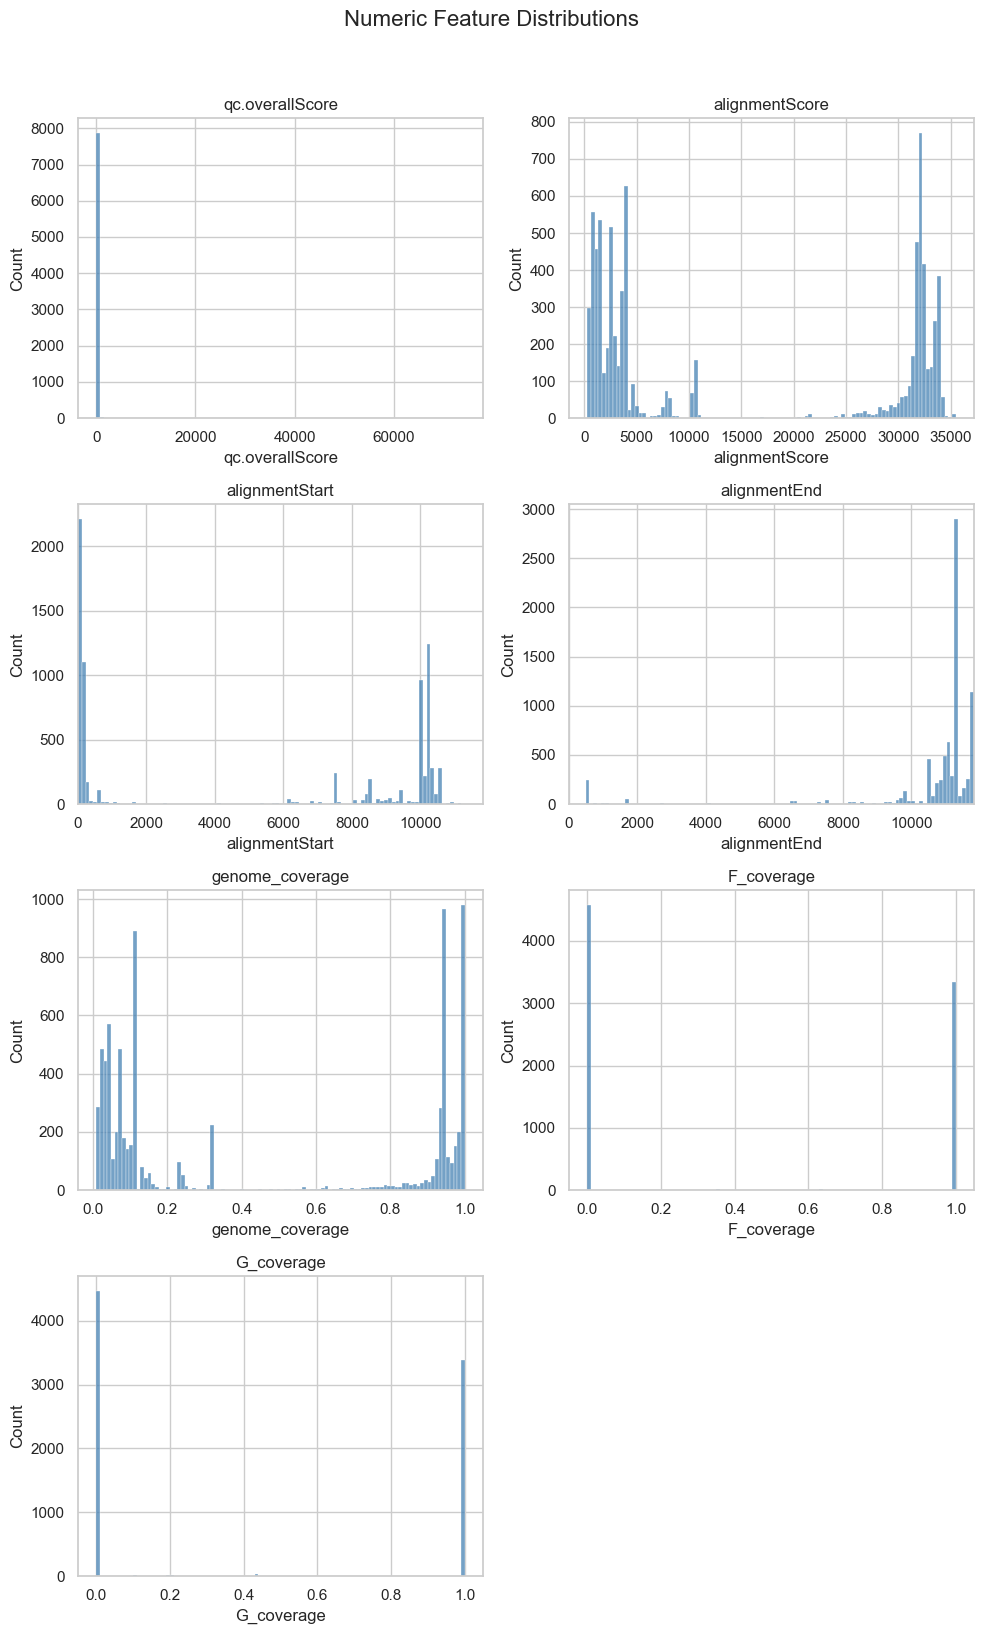

In [77]:
numeric_cols = df.select_dtypes(include="number").columns.tolist()
numeric_cols.remove("subtypes")
x_axis = {"alignmentStart": (0, 11826), "alignmentEnd": (0, 11826)}
if numeric_cols:
    n_cols = min(2, len(numeric_cols))
    n_rows = math.ceil(len(numeric_cols) / n_cols)
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows), squeeze=False)
    # Figure (class) = container for all plot elements
    # Axes (class) = one (sub-)plot in a figure
        # contains plotted data, axis ticks, labels, title, legend, etc.
    axes = axes.flatten()
    for ax, col in zip(axes, numeric_cols):
        """ if col in x_axis:
            lower, upper = x_axis[col]
        else:
            lower, upper = (df[col].min() - 0.05*df[col].max(), df[col].max()+0.05*df[col].max()) """
        sns.histplot(df[col].dropna(), ax=ax, kde=False, color="steelblue", bins = 100)
        ax.set_title(col)
        if col in x_axis:
            lower, upper = x_axis[col]
            ax.set_xlim(lower, upper)
    for ax in axes[len(numeric_cols):]:
        ax.set_visible(False)
    fig.suptitle("Numeric Feature Distributions", fontsize=16, y=1.02)
    plt.tight_layout()
    plt.show()
else:
    print("No numeric columns found.")


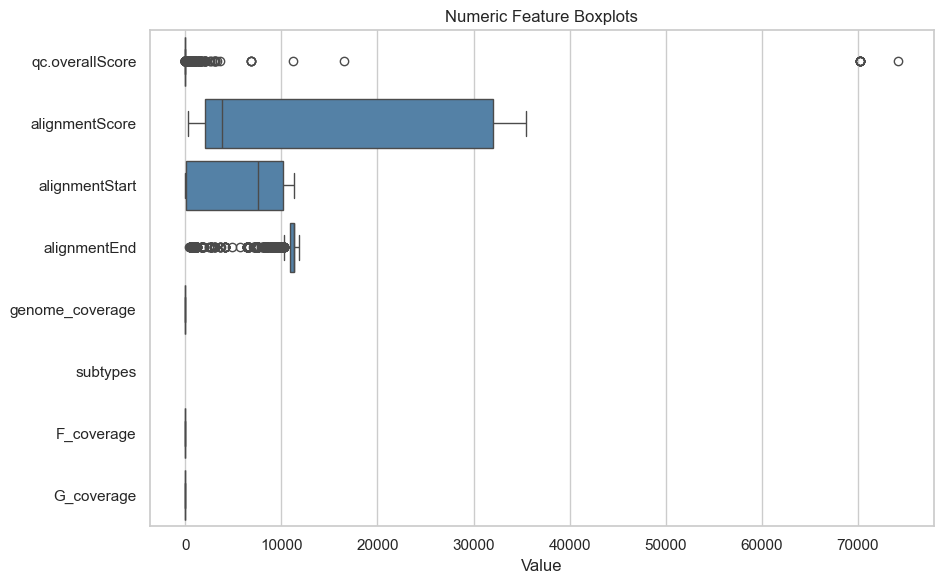

In [78]:
numeric_cols = df.select_dtypes(include="number").columns.tolist()
if numeric_cols:
    melted = df[numeric_cols].melt(var_name="variable", value_name="value")
    plt.figure(figsize=(max(6, len(numeric_cols) * 1.2), 6))
    sns.boxplot(data=melted, x="value", y="variable", orient="h", color="steelblue")
    plt.title("Numeric Feature Boxplots")
    plt.xlabel("Value")
    plt.ylabel("")
    plt.tight_layout()
    plt.show()
else:
    print("No numeric columns found.")


In [79]:
alignment = AlignIO.read("../ingest/data/aligment.fasta", "fasta")
print(alignment)

Alignment with 7961 rows and 11826 columns
---------------------------CCAGTTTCTTACTGCTC...--- KY680380
---------------------------CCAGTTTCTTACTGCTC...TTG KY680382
---------------------------CCAGTTTCTTACTGCTC...--- KY680385
---------------------------CCAGTTTCTTACTGCTC...--- KY680384
---------------------------CCAGTTTCTTACTGCTC...--- KY680381
---------------------------CCAGTTTCTTACTGCTC...TTG KY680383
---------------------------CCAGTTTCTTACTGCTC...--- KY680378
---------------------------CCAGTTTCTTACTGCTC...--- KY680379
---------------------------CCAGTTTCTTACTGCTC...--- KY680386
---------------------------CCAGTTTCTTACTGCTC...--- KY680391
---------------------------CCAGTTTCTTACTGCTC...TTG KY680389
---------------------------CCAGTTTCTTACTGCTC...--- KY680390
---------------------------CCAGTTTCTTACTGCTC...--- KY680388
---------------------------CCAGTTTCTTACTGCTC...TTG KY680387
---------------------------CCAGTTTCTTACTGCTC...TTG KY680393
---------------------------CCAGTTTCTTACTGCTC...--- KY6803

In [80]:
length = alignment.get_alignment_length()
nr_seq = len(alignment)

arr = np.array([list(str(rec.seq).upper()) for rec in alignment])
missing = np.isin(arr, ["-", "N", "?"])
not_missing = ~missing

count = not_missing.sum(axis=0)
frac = count/nr_seq

coverage_df = pd.DataFrame({"pos": np.arange(1, length+1), "coverage": frac})

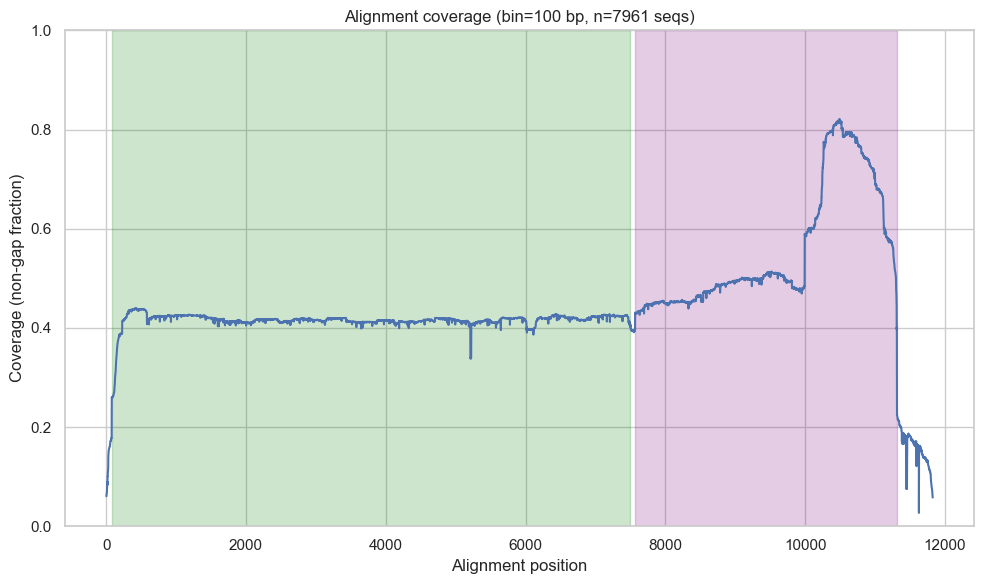

In [81]:
plt.plot(coverage_df["pos"], coverage_df["coverage"])
plt.axvspan(77, 7501, color="green", alpha=0.2)
plt.axvspan(7567, 11313, color="purple", alpha=0.2)
plt.ylim(0, 1)
plt.xlabel("Alignment position")
plt.ylabel("Coverage (non-gap fraction)")
plt.title(f"Alignment coverage (bin={bin_size} bp, n={nr_seq} seqs)")
plt.tight_layout()
plt.show()

In [93]:
region_palette = {
    "Africa": "#1f77b4",       # blue
    "Asia": "#ff7f0e",         # orange
    "Europe": "#2ca02c",       # green
    "North America": "#d62728",# red
    "Oceania": "#9467bd",      # purple
    "South America": "#8c564b" # brown
}


Text(0.5, 1.0, 'Samples per year by region')

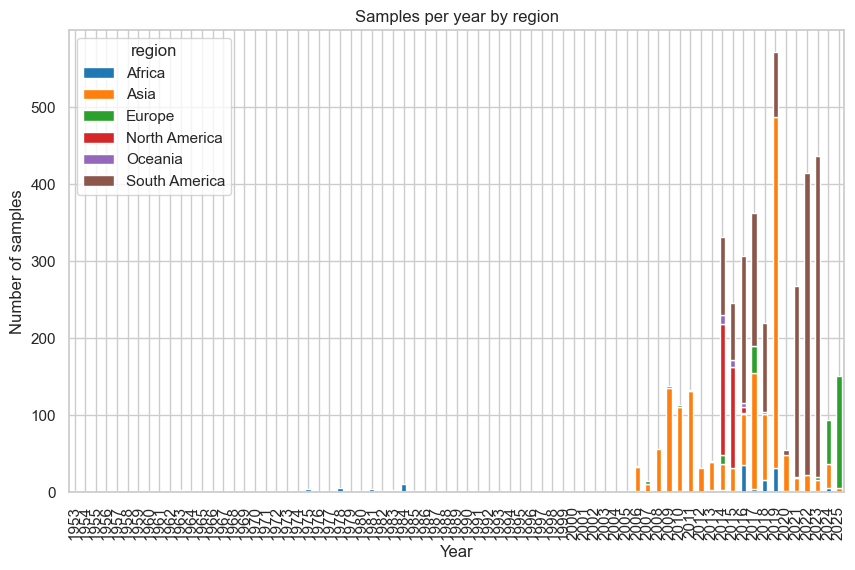

In [94]:
df["date"] = pd.to_datetime(df["date"], errors="coerce")
df["year"] = df.date.dt.year
counts = (df.groupby(["year", "region"])
          .size()
          .unstack(fill_value=0)
          .sort_index()
)

all_years = pd.RangeIndex(counts.index.min(), counts.index.max() + 1)
counts = counts.reindex(all_years, fill_value=0)

ax = counts.plot(kind="bar", stacked=True, color=region_palette)
ax.set_xlabel("Year")
ax.set_ylabel("Number of samples")
ax.set_title("Samples per year by region")

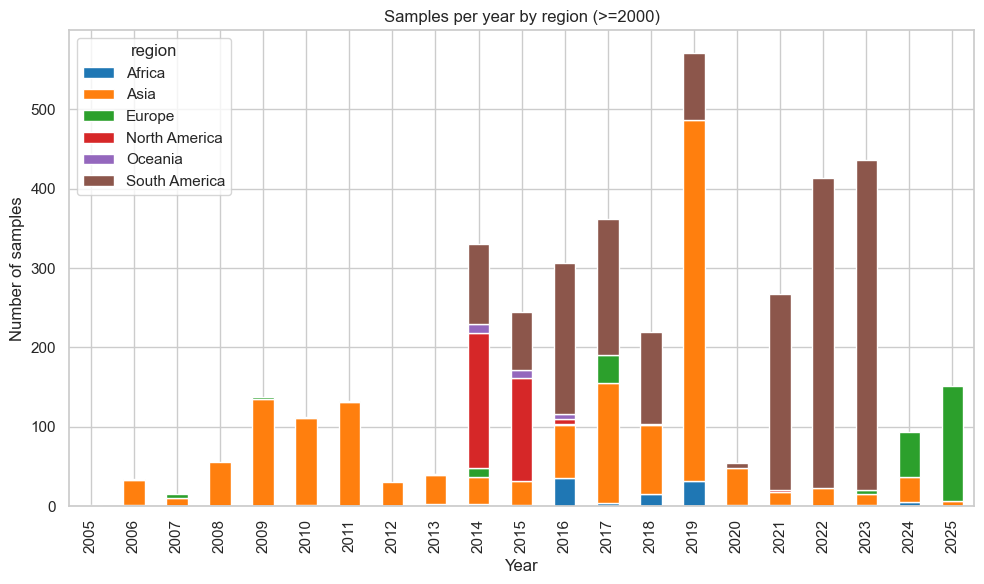

In [95]:
# keep only rows with year >= 2000
df_recent = df[df["year"] >= 2000]

# regroup and pivot
counts_recent = (
    df_recent.groupby(["year", "region"])
             .size()
             .unstack(fill_value=0)
             .sort_index()
)

counts_recent.index = counts_recent.index.astype(int)
# plot again
ax = counts_recent.plot(kind="bar", stacked=True, color=region_palette)
ax.set_xlabel("Year")
ax.set_ylabel("Number of samples")
ax.set_title("Samples per year by region (>=2000)")
plt.tight_layout()
plt.show()


/var/folders/w0/pzdl0rq53pd7lqhw_k66lsv80000gn/T/ipykernel_72299/3989328048.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_recent["length"] = df_recent["alignmentEnd"] - df_recent["alignmentStart"] + 1


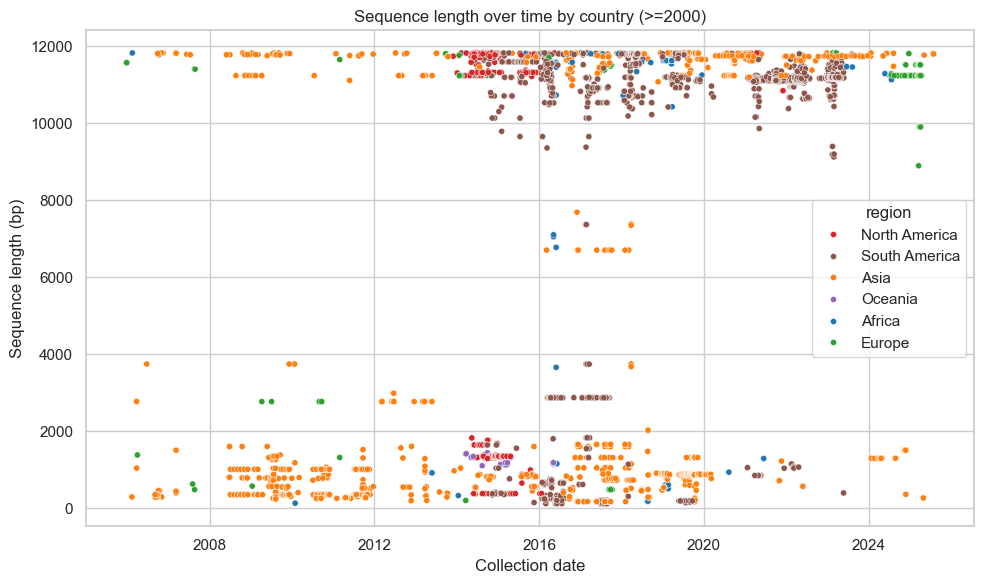

In [103]:
df_recent["length"] = df_recent["alignmentEnd"] - df_recent["alignmentStart"] + 1

plt.figure()
sns.scatterplot(
    data=df_recent, x="date", y="length", hue="region", palette=region_palette, s=20
)
plt.xlabel("Collection date")
plt.ylabel("Sequence length (bp)")
plt.title("Sequence length over time by country (>=2000)")
plt.tight_layout()
plt.show()

['accession', 'genbank_accession_rev', 'strain', 'date', 'region', 'country', 'division', 'location', 'host', 'date_submitted', 'sra_accession', 'abbr_authors', 'authors', 'institution', 'clade', 'qc.overallStatus']
Skipping accession (all values unique)
Skipping genbank_accession_rev (all values unique)
               strain  count
0    Caribbean strain     20
1               Asian     17
2   CP9-Thailand-2010     16
3  CP16-Thailand-2010     16
4  CP13-Thailand-2010     16


/var/folders/w0/pzdl0rq53pd7lqhw_k66lsv80000gn/T/ipykernel_82022/4278887848.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=value_counts, x=col, y="count", palette="viridis")


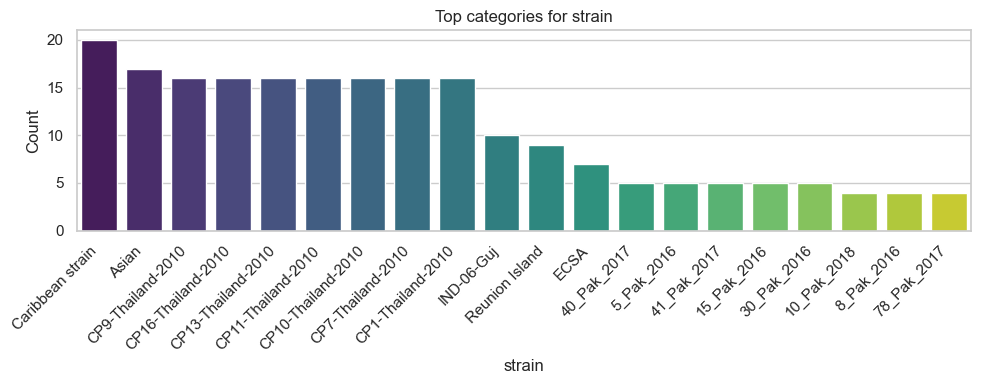

         date  count
0  XXXX-XX-XX   1579
1  2010-XX-XX    335
2  2009-XX-XX    178
3  2014-XX-XX    171
4  2016-XX-XX    147


/var/folders/w0/pzdl0rq53pd7lqhw_k66lsv80000gn/T/ipykernel_82022/4278887848.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=value_counts, x=col, y="count", palette="viridis")


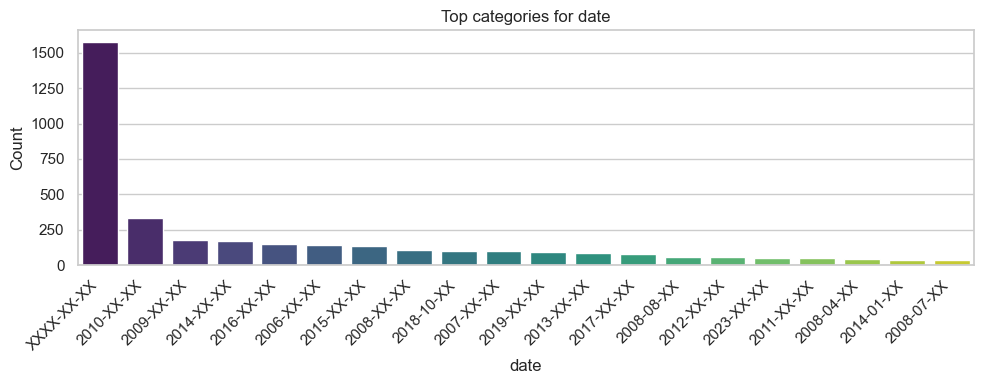

          region  count
0           Asia   4135
1  South America   2070
2        Missing   1143
3  North America    538
4         Africa    424


/var/folders/w0/pzdl0rq53pd7lqhw_k66lsv80000gn/T/ipykernel_82022/4278887848.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=value_counts, x=col, y="count", palette="viridis")


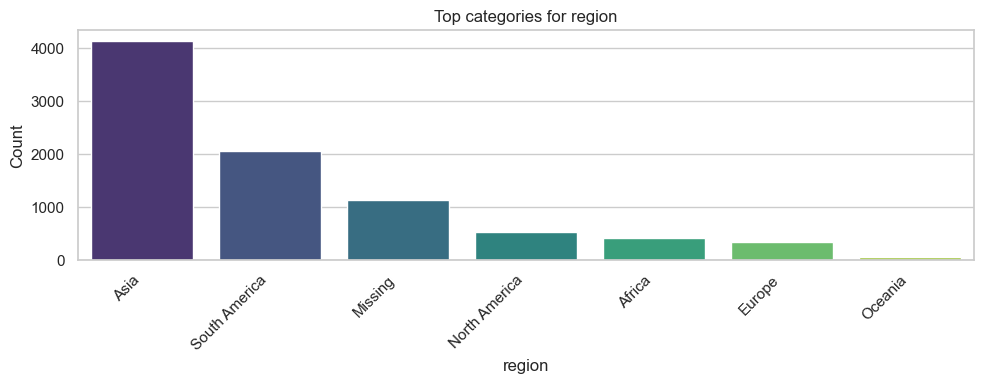

     country  count
0      India   1569
1     Brazil   1537
2    Missing   1143
3   Thailand    878
4  Singapore    429


/var/folders/w0/pzdl0rq53pd7lqhw_k66lsv80000gn/T/ipykernel_82022/4278887848.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=value_counts, x=col, y="count", palette="viridis")


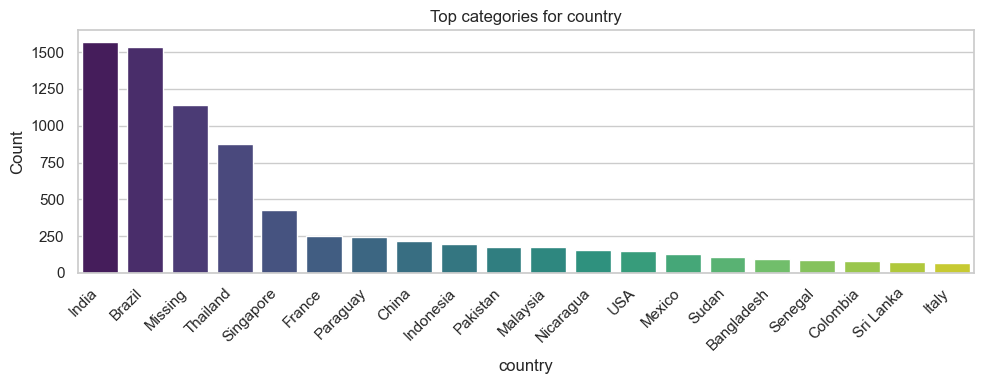

              division  count
0              Missing   5651
1              Réunion    185
2  Ratchaburi Province    112
3              Managua     97
4             Teresina     83


/var/folders/w0/pzdl0rq53pd7lqhw_k66lsv80000gn/T/ipykernel_82022/4278887848.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=value_counts, x=col, y="count", palette="viridis")


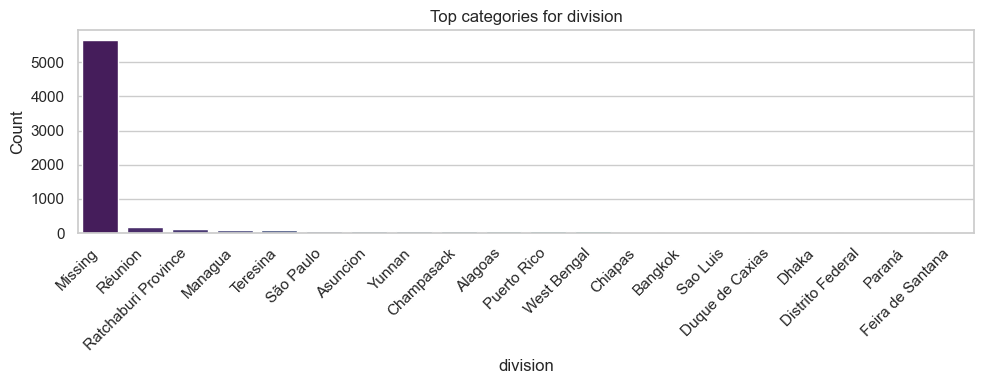

              location  count
0              Missing   7230
1                Bahia    124
2              Central    101
3                Piaui     89
4  Rio Grande do Norte     53


/var/folders/w0/pzdl0rq53pd7lqhw_k66lsv80000gn/T/ipykernel_82022/4278887848.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=value_counts, x=col, y="count", palette="viridis")


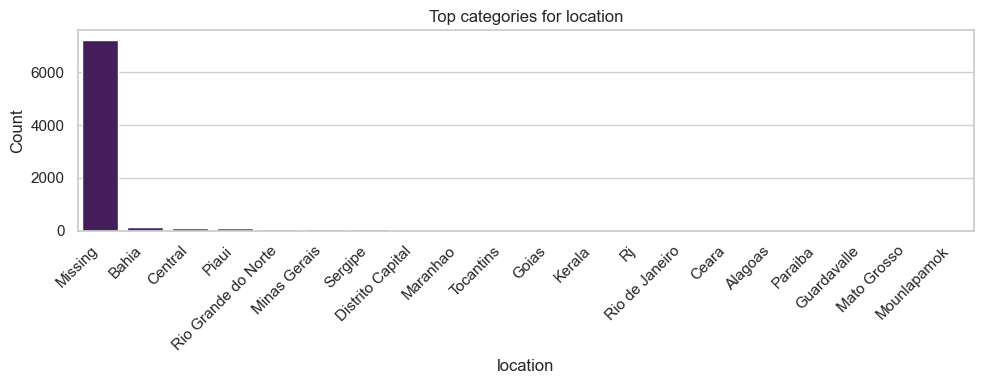

               host  count
0      Homo sapiens   6826
1           Missing   1494
2     Aedes aegypti    152
3         Culicidae     83
4  Aedes albopictus     39


/var/folders/w0/pzdl0rq53pd7lqhw_k66lsv80000gn/T/ipykernel_82022/4278887848.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=value_counts, x=col, y="count", palette="viridis")


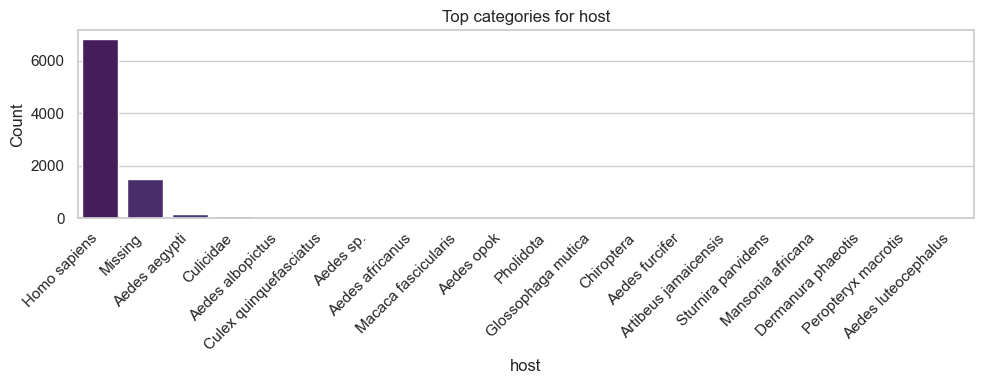

  date_submitted  count
0     2023-06-30    425
1     2020-12-31    393
2     2020-11-01    326
3     2017-04-01    193
4     2025-06-10    184


/var/folders/w0/pzdl0rq53pd7lqhw_k66lsv80000gn/T/ipykernel_82022/4278887848.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=value_counts, x=col, y="count", palette="viridis")


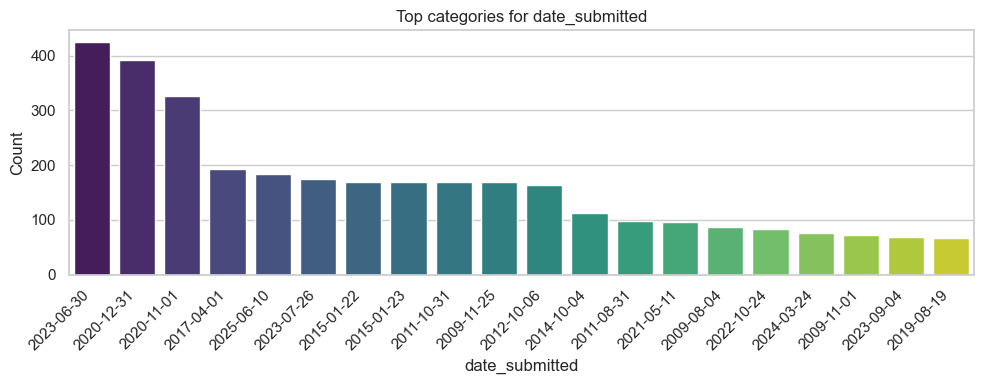

  sra_accession  count
0       Missing   8659
1   SRR33875775      2
2   SRR33875773      2
3   SRR33875781      2
4   SRR33875783      2


/var/folders/w0/pzdl0rq53pd7lqhw_k66lsv80000gn/T/ipykernel_82022/4278887848.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=value_counts, x=col, y="count", palette="viridis")


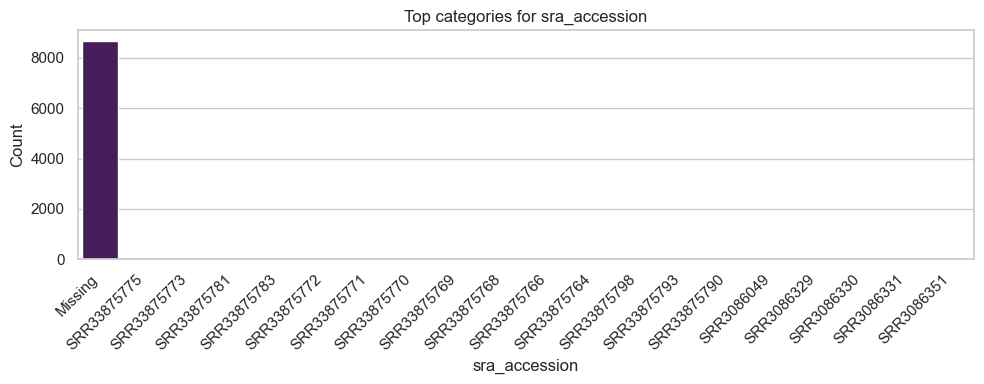

          abbr_authors  count
0        Xavier et al.    456
1  Hapuarachchi et al.    382
2   Chansaenroj et al.    371
3         Singh et al.    366
4       CARRICK et al.    338


/var/folders/w0/pzdl0rq53pd7lqhw_k66lsv80000gn/T/ipykernel_82022/4278887848.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=value_counts, x=col, y="count", palette="viridis")


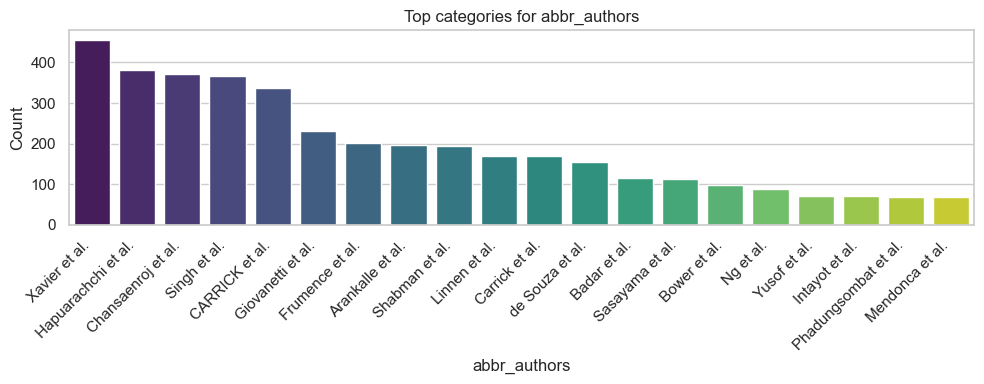

                                             authors  count
0  Xavier,J.,Fonseca,V.,Oliveira,C.,Lima,M.,Frits...    425
1  Chansaenroj,J.,Khongwichit,S.,Thongmee,T.,Benj...    356
2                               CARRICK,J.,LINNEN,J.    338
3  Hapuarachchi,H.C.,Wong,W.Y.,Koo,C.,Tien,W.P.,L...    326
4     Singh,P.,Sharma,P.,Rizvi,M.A.,Mittal,V.,Rai,A.    228


/var/folders/w0/pzdl0rq53pd7lqhw_k66lsv80000gn/T/ipykernel_82022/4278887848.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=value_counts, x=col, y="count", palette="viridis")
/var/folders/w0/pzdl0rq53pd7lqhw_k66lsv80000gn/T/ipykernel_82022/4278887848.py:28: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


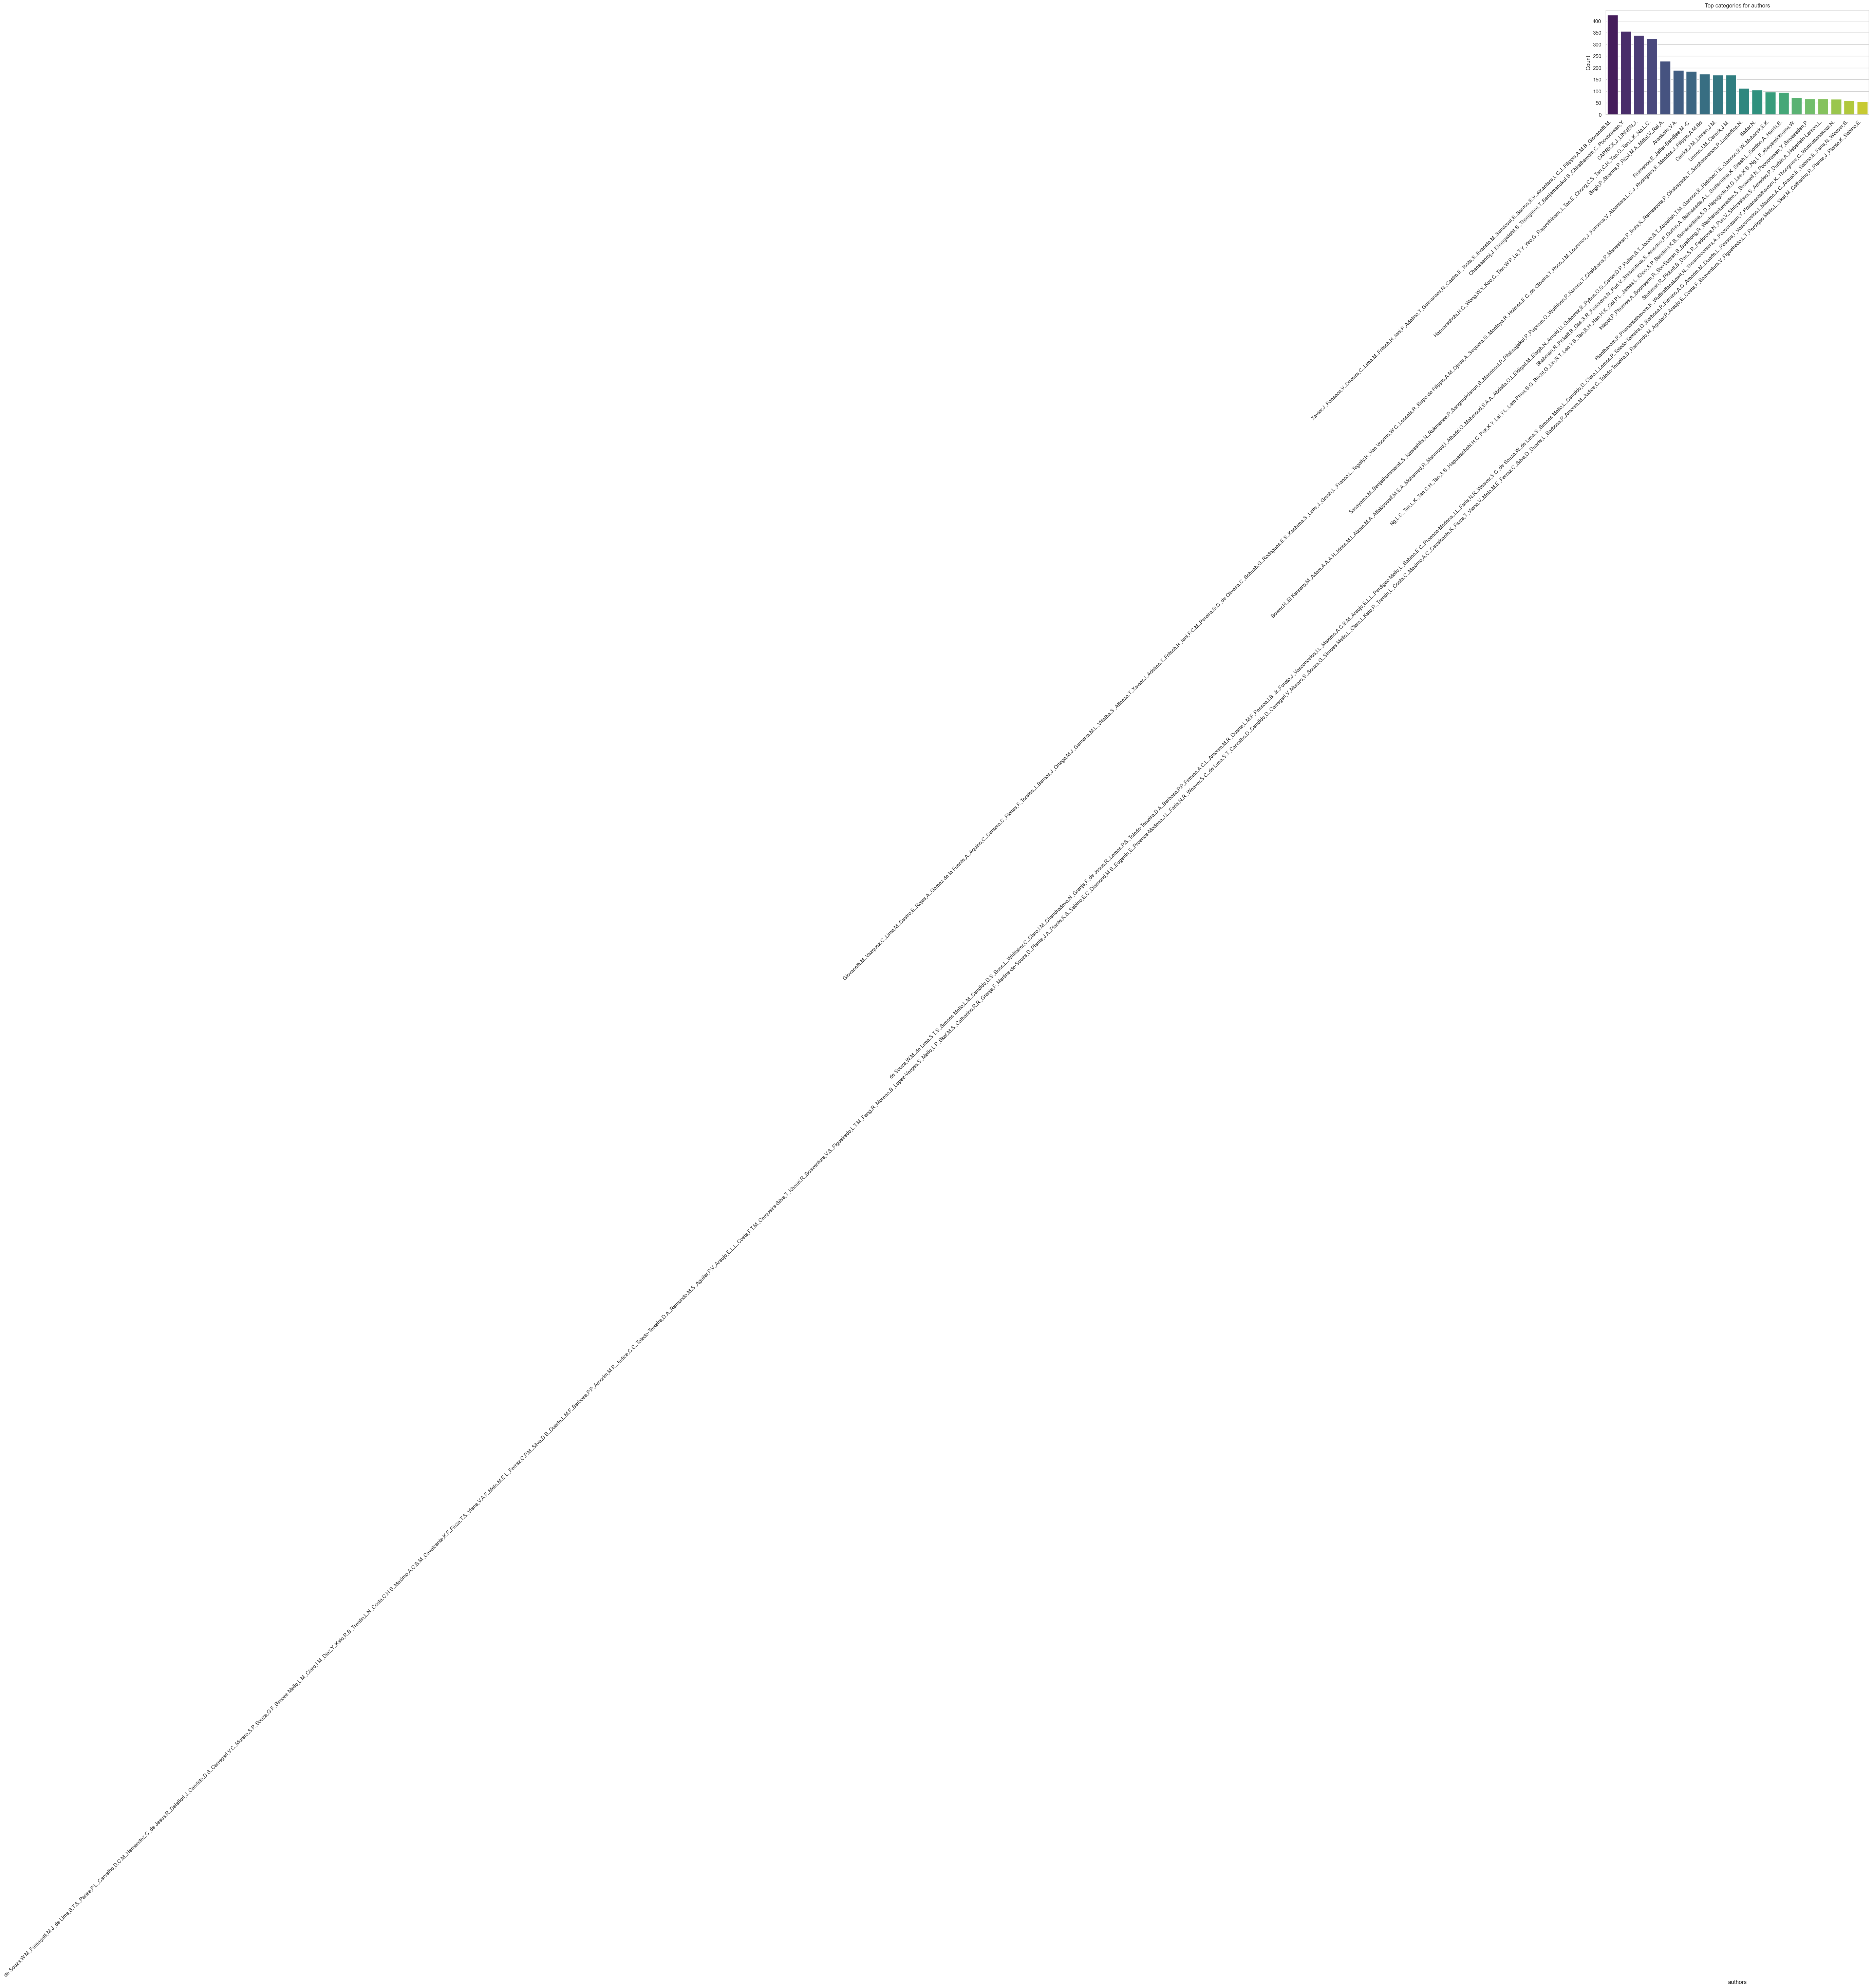

                                         institution  count
0                                            Missing   1024
1  Pan American Health Organization (PAHO), PHE-B...    703
2  National Environment Agency, Environmental Hea...    418
3  Faculty of Medical, Chulalongkorn University, ...    356
4  National Centre for Disease Control, Biochemis...    228


/var/folders/w0/pzdl0rq53pd7lqhw_k66lsv80000gn/T/ipykernel_82022/4278887848.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=value_counts, x=col, y="count", palette="viridis")
/var/folders/w0/pzdl0rq53pd7lqhw_k66lsv80000gn/T/ipykernel_82022/4278887848.py:28: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


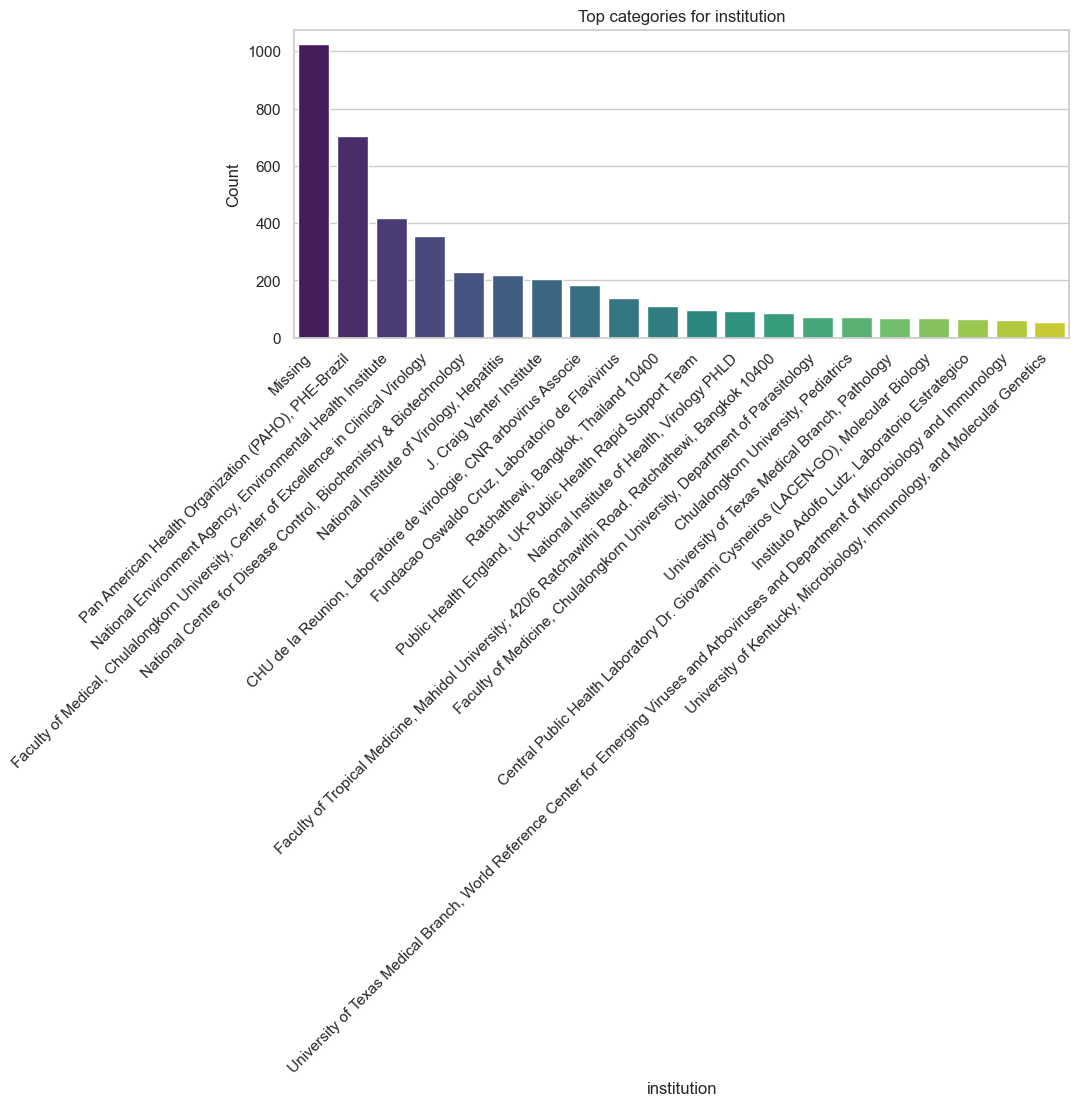

          clade  count
0       II-ECSA   6442
1     III-Asian   1296
2       Missing    747
3  I-WestAfrica    145
4    unassigned     78


/var/folders/w0/pzdl0rq53pd7lqhw_k66lsv80000gn/T/ipykernel_82022/4278887848.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=value_counts, x=col, y="count", palette="viridis")


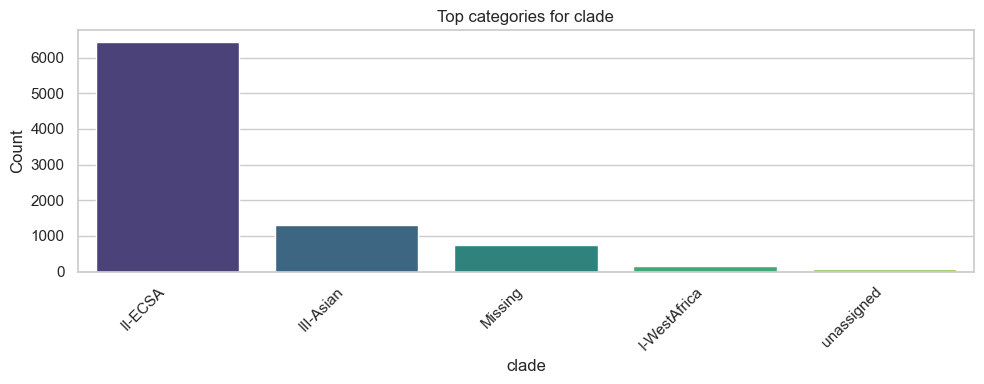

  qc.overallStatus  count
0             good   7428
1          Missing    747
2         mediocre    272
3              bad    261


/var/folders/w0/pzdl0rq53pd7lqhw_k66lsv80000gn/T/ipykernel_82022/4278887848.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=value_counts, x=col, y="count", palette="viridis")


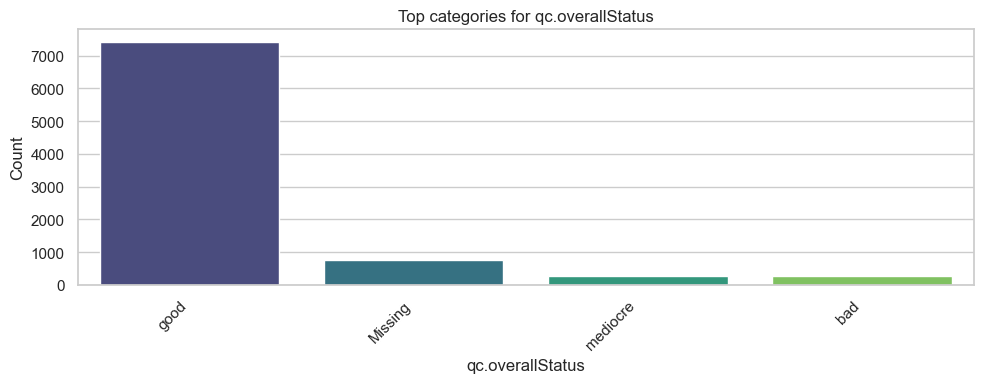

In [40]:
categorical_cols = df.select_dtypes(include=["object", "category"]).columns.tolist()
print(categorical_cols)
if categorical_cols:
    for col in categorical_cols:
        n_unique = df[col].nunique(dropna=False)
        n_total = len(df[col])

        # Skip if every value is unique
        if n_unique == n_total:
            print(f"Skipping {col} (all values unique)")
            continue
        
        value_counts = (
            df[col]
            .fillna("Missing")
            .value_counts()
            .head(20)
            .reset_index()
        )
        value_counts.columns = [col, "count"]
        print(value_counts.head())
        plt.figure(figsize=(10, 4))
        sns.barplot(data=value_counts, x=col, y="count", palette="viridis")
        plt.title(f"Top categories for {col}")
        plt.ylabel("Count")
        plt.xlabel(col)
        plt.xticks(rotation=45, ha="right")
        plt.tight_layout()
        plt.show()
else:
    print("No categorical columns found.")
